## 1. Explorativní analýza

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data = pd.read_csv('data.tsv', sep='\t', header=None, names=[
    'URL', 'Name', 'Price', 'Color', 'Weight', 'Smart Features', 'Energy Class', 'Noise Level'
])

# Replace "not found" with NaN
data.replace(to_replace='.*not found.*', value=np.nan, regex=True, inplace=True)

# Total number of missing values
total_missing = data.isna().sum().sum()
# Number of missing values in each column
missing_per_column = data.isna().sum()
# Number of rows with at least one missing value
rows_with_missing = data.isna().any(axis=1).sum()
# Number of rows with more than one missing value
rows_with_multiple_missing = (data.isna().sum(axis=1) > 1).sum()

# Convert columns to numeric
data['Price'] = pd.to_numeric(data['Price'].str.replace(' €', ''), errors='coerce')
data['Weight'] = pd.to_numeric(data['Weight'].str.replace(' kg', ''), errors='coerce')
data['Noise Level'] = pd.to_numeric(data['Noise Level'].str.replace(' dB(A)', ''), errors='coerce')

# Handle missing values
data['Color'].fillna('Unknown', inplace=True)
data['Smart Features'].fillna('Unknown', inplace=True)
data['Energy Class'].fillna('Unknown', inplace=True)

# Selected columns
columns_to_analyze = ['Price', 'Color', 'Weight', 'Smart Features', 'Energy Class', 'Noise Level']

for column in columns_to_analyze:
    print(f"Column: {column}")
    print(f"Data Type: {data[column].dtype}")
    print(f"Number of Unique Values: {data[column].nunique()}")
    
    print("The Most Frequent Values:")
    print(data[column].value_counts().head(2))
    
    # Range for numerical columns
    if data[column].dtype in ['float64', 'int64']:
        print(f"Min: {data[column].min()}")
        print(f"Max: {data[column].max()}")
    
    print("-" * 30 + "\n")



Column: Price
Data Type: float64
Number of Unique Values: 69
The Most Frequent Values:
Price
499.0    9
749.0    6
Name: count, dtype: int64
Min: 34.95
Max: 3899.0
------------------------------

Column: Color
Data Type: object
Number of Unique Values: 12
The Most Frequent Values:
Color
White              76
Stainless Steel    28
Name: count, dtype: int64
------------------------------

Column: Weight
Data Type: float64
Number of Unique Values: 60
The Most Frequent Values:
Weight
30.0    6
55.0    5
Name: count, dtype: int64
Min: 5.0
Max: 152.0
------------------------------

Column: Smart Features
Data Type: object
Number of Unique Values: 3
The Most Frequent Values:
Smart Features
No     117
Yes     19
Name: count, dtype: int64
------------------------------

Column: Energy Class
Data Type: object
Number of Unique Values: 9
The Most Frequent Values:
Energy Class
E    78
D    20
Name: count, dtype: int64
------------------------------

Column: Noise Level
Data Type: float64
Number of 

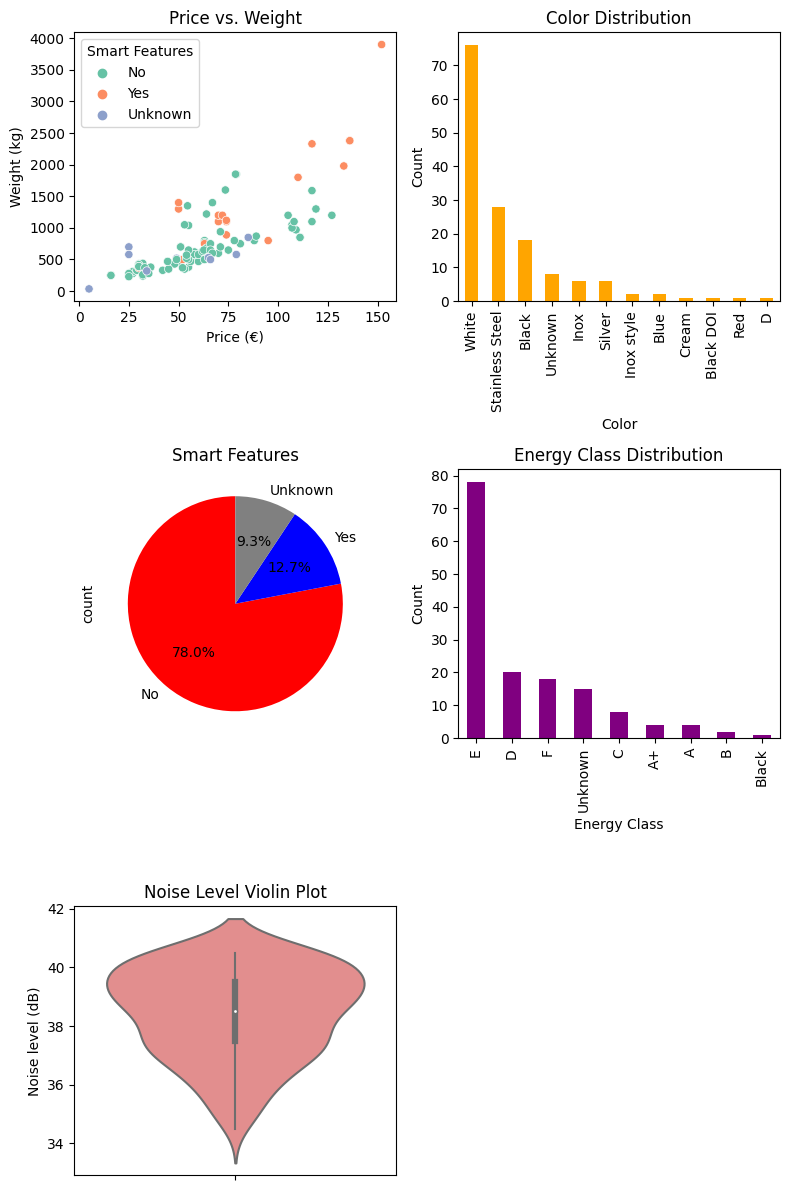

In [2]:
plt.figure(figsize=(8, 12))

# Price vs. Weight
plt.subplot(3, 2, 1)
sns.scatterplot(y=data['Price'], x=data['Weight'], hue=data['Smart Features'], palette='Set2')
plt.title('Price vs. Weight')
plt.xlabel('Price (€)')
plt.ylabel('Weight (kg)')

# Color distribution
plt.subplot(3, 2, 2)
data['Color'].value_counts().plot(kind='bar', color='orange')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')

# Smart Features
plt.subplot(3, 2, 3)
data['Smart Features'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'gray'], startangle=90)
plt.title('Smart Features')

# Energy Class distribution
plt.subplot(3, 2, 4)
data['Energy Class'].value_counts().plot(kind='bar', color='purple')
plt.title('Energy Class Distribution')
plt.xlabel('Energy Class')
plt.ylabel('Count')

# Noise Level distribution
plt.subplot(3, 2, 5)
sns.violinplot(y=data['Noise Level'], color='lightcoral')
plt.title('Noise Level Violin Plot')
plt.ylabel('Noise level (dB)')

plt.tight_layout()
plt.show()

Z prvního grafu price vs weight můžeme vyčíst že s vyšující se cenou roste také hmotnost lednice.

V druhém grafu vidíme že bílé lednice jsou zdaleka nejpopulárnější.

Drtivá většina lednic neobsahuje chytré prvky.

Nejčastější energetická třída je E a výrazně převyšuje všechny ostatní.

Hluk který lednice vydávají se pohybuje v  rozmezí 34 až 41 dB.

In [3]:
numerical_columns = ['Price', 'Weight', 'Noise Level']

# Detect outliers for each numerical column
for column in numerical_columns:
    print(f"Analyzing column: {column}")
    if data[column].notna().sum() > 0:  # Valid values
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

        print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"  Outliers detected ({len(outliers)}):")
        print(outliers.tolist())
    print("-" * 30 + "\n")

Analyzing column: Price
  Q1: 379.0, Q3: 836.5, IQR: 457.5
  Lower Bound: -307.25, Upper Bound: 1522.75
  Outliers detected (10):
[1849.0, 1979.0, 3899.0, 2379.0, 2379.0, 1799.0, 1849.0, 2329.0, 1589.0, 1599.0]
------------------------------

Analyzing column: Weight
  Q1: 44.875, Q3: 74.25, IQR: 29.375
  Lower Bound: 0.8125, Upper Bound: 118.3125
  Outliers detected (6):
[119.0, 133.0, 152.0, 127.0, 136.0, 136.0]
------------------------------

Analyzing column: Noise Level
  Q1: 37.5, Q3: 39.5, IQR: 2.0
  Lower Bound: 34.5, Upper Bound: 42.5
  Outliers detected (0):
[]
------------------------------



Zanalyzoval jsem číselné atributy pro nalezení outlierů, jako způsob jejich objevení jsem použil interkvartilové rozpětí. Odlehlé hodnoty budou identifikovány jako hodnoty, které leží mimo následující rozsah:

Dolní hranice=Q1−1.5\*IQR, horní hranice=Q3+1.5\*IQR

In [4]:
print("Total number of missing values:", total_missing)
print("\nMissing values per column:\n", missing_per_column)
print("\nNumber of rows with at least one missing value:", rows_with_missing)
print("Number of rows with more than one missing value:", rows_with_multiple_missing)

Total number of missing values: 89

Missing values per column:
 URL                0
Name               0
Price              0
Color              8
Weight            38
Smart Features    14
Energy Class      15
Noise Level       14
dtype: int64

Number of rows with at least one missing value: 74
Number of rows with more than one missing value: 12


Pearson Correlation Coefficient:
                Price    Weight  Noise Level
Price        1.000000  0.771992    -0.824532
Weight       0.771992  1.000000    -0.709019
Noise Level -0.824532 -0.709019     1.000000


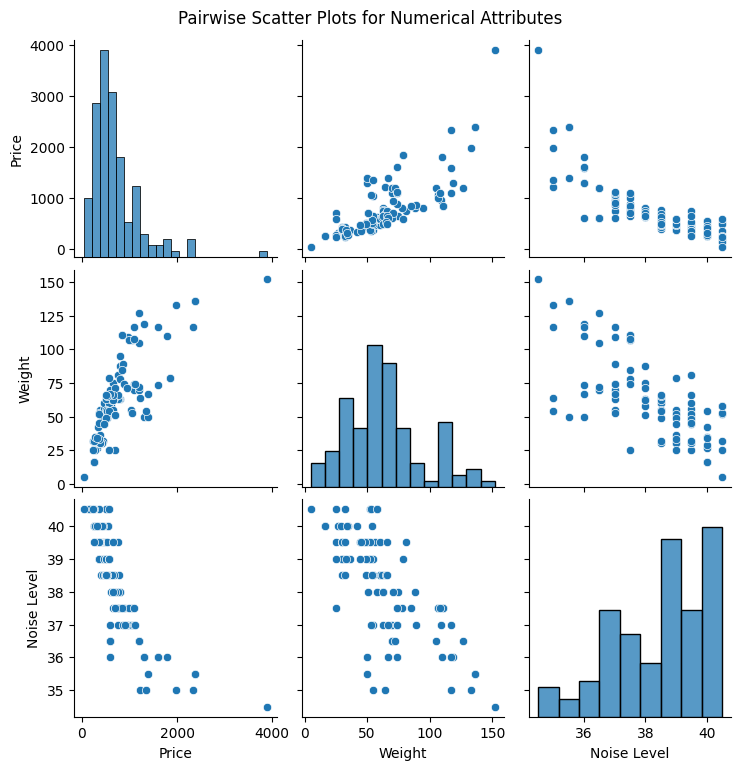

In [5]:
# Select numerical columns
numerical_columns = ['Price', 'Weight', 'Noise Level']

# Pearson correlation matrix
correlation_matrix = data[numerical_columns].corr()

print("Pearson Correlation Coefficient:")
print(correlation_matrix)

# Scatterplots for pairwise correlation
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairwise Scatter Plots for Numerical Attributes', y=1.02)
plt.show()

Z korelace dat můžeme vyčíst že když roste cena, roste hmotnost a hluk naopak klesá, když roste váha, tak hluk také klesá

## 2. Příprava datové sady 
- Připravíme datovou sadu pro predikci cen lednic 
- Připravíme datovou sadu pro klasifikaci lednic podle energetické třídy

In [6]:
data_price = data.copy()
data_enClass = data.copy()

### 1) Připravíme datovou sadu pro predikci cen lednic 

In [7]:
data_price.head()

,URL,Name,Price,Color,Weight,Smart Features,Energy Class,Noise Level
0,https://www.electrocity.ie/product/hoover-h-fr...,Hoover H-Fridge 300 55cm Freestanding Fridge F...,369.0,White,52.0,No,F,39.0
1,https://www.electrocity.ie/product/hoover-h-fr...,Hoover H-Freeze 300 Undercounter Freezer,399.0,White,30.0,No,Unknown,38.5
2,https://www.electrocity.ie/product/haier-serie...,Haier Series 5 American Style Fridge Freezer |...,1199.0,Stainless Steel,105.0,No,D,36.5
3,https://www.electrocity.ie/product/hoover-free...,Hoover Freestanding Undercounter Freezer | Black,279.0,Black,27.0,No,Unknown,NaN
4,https://www.electrocity.ie/product/hoover-h-fr...,Hoover H-Fridge 300 Built-In Undercounter Fridge,379.0,White,31.0,No,Unknown,39.0


**Odstranění atributů** 
- Pro predikci určitě nebudeme potřebovat URL ani jméno lednice, zajímají nás pouze numerická a kategorická data.


In [8]:
print("Original columns:", data_price.columns)

atribut_k_mazani = ["URL", "Name"]
data_price = data_price.drop(columns=atribut_k_mazani)

print("Columns after removal:", data_price.columns)

Original columns: Index(['URL', 'Name', 'Price', 'Color', 'Weight', 'Smart Features',
       'Energy Class', 'Noise Level'],
      dtype='object')
Columns after removal: Index(['Price', 'Color', 'Weight', 'Smart Features', 'Energy Class',
       'Noise Level'],
      dtype='object')


**Chybějící hodnoty**

Podle analýzy odstraníme chybějící hodnoty:
- Odstraníme záznamy, kde chybí více atributů.
- U ostatních nahradíme chybějící data průměrem ze všech hodnot atributu. 

In [9]:
# Delete rows with more than one missing value
data_price = data_price[data_price.isnull().sum(axis=1) <= 1]

# Replacing missing values ​​in the 'Weight' and 'Noise Level' column with the average
mean_weight = data_price["Weight"].mean()
data_price["Weight"].fillna(mean_weight, inplace=True)
mean_noise_level = data_price["Noise Level"].mean()
data_price["Noise Level"].fillna(mean_noise_level, inplace=True)


total_missing = data_price.isna().sum().sum()
missing_per_column = data_price.isna().sum()
rows_with_missing = data_price.isna().any(axis=1).sum()
rows_with_multiple_missing = (data_price.isna().sum(axis=1) > 1).sum()

print("Total number of missing values:", total_missing)
print("\nMissing values per column:\n", missing_per_column)
print("\nNumber of rows with at least one missing value:", rows_with_missing)
print("Number of rows with more than one missing value:", rows_with_multiple_missing)

Total number of missing values: 0

Missing values per column:
 Price             0
Color             0
Weight            0
Smart Features    0
Energy Class      0
Noise Level       0
dtype: int64

Number of rows with at least one missing value: 0
Number of rows with more than one missing value: 0


**Odstranění odlehlých hodnot**

Podle analýzy odstraníme odlehlé hodnoty u atributů 'Price' a 'Weight'.

In [10]:
# Removing outliers based on IQR
def remove_outliers(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Boundaries for Price
price_lower_bound = -307.25
price_upper_bound = 1522.75
data_price = remove_outliers(data_price, "Price", price_lower_bound, price_upper_bound)

# Boundaries for Weight
weight_lower_bound = 0.8125
weight_upper_bound = 118.3125
data_price = remove_outliers(data_price, "Weight", weight_lower_bound, weight_upper_bound)

print("After removing outliers:")
print(data_price)

After removing outliers:
       Price            Color  Weight Smart Features Energy Class  Noise Level
0     369.00            White    52.0             No            F    39.000000
1     399.00            White    30.0             No      Unknown    38.500000
2    1199.00  Stainless Steel   105.0             No            D    36.500000
3     279.00            Black    27.0             No      Unknown    38.440741
4     379.00            White    31.0             No      Unknown    39.000000
..       ...              ...     ...            ...          ...          ...
145   319.00            White    34.0        Unknown           A+    40.000000
146   699.00            White    25.0        Unknown            E    37.500000
147   579.00            White    25.0        Unknown            E    39.000000
148    34.95          Unknown     5.0        Unknown            C    40.500000
149   229.00            White    25.0             No            F    40.500000

[134 rows x 6 columns]


Protože připravujeme datovou sadu pro predikci cen ledniček, budeme potřebovat, aby všechny atributy byly číselné. Proto provedeme **transformaci kategorických atributů na numerické** a také **normalizaci těchto atributů**.

- Pro transformaci použijeme *LabelEncoder*, který přiřadí každé unikátní hodnotě číslo (index), začínající od 0.
- Normalizaci provedeme pomocí *MinMaxScaler*, který pro každý atribut spočítá minimální a maximální hodnotu a následně převede všechny hodnoty na základě tohoto rozsahu podle vzorce:
$$
X_{\text{scaled}} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

In [17]:
categorical_columns = ["Color", "Smart Features", "Energy Class"]
label_encoders = {}

# Label encoding for categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    data_price[column] = le.fit_transform(data_price[column].astype(str))
    label_encoders[column] = le

# Normalizing numeric attributes to the interval <0,1> using MinMaxScaler
numerical_columns = ["Price", "Weight", "Noise Level"]
scaler = MinMaxScaler()

# Applying a scaler to numeric attributes
data_price[numerical_columns] = scaler.fit_transform(data_price[numerical_columns])

data_price.to_csv('data_price.csv',index=False)
print("Transformed and normalized dataset:")
print(data_price)

Transformed and normalized dataset:
        Price  Color    Weight  Smart Features  Energy Class  Noise Level
0    0.244896      8  0.419643               0             7     0.727273
1    0.266889      8  0.223214               0             8     0.636364
2    0.853378      6  0.892857               0             5     0.272727
3    0.178916      0  0.196429               0             8     0.625589
4    0.252227      8  0.232143               0             8     0.727273
..        ...    ...       ...             ...           ...          ...
145  0.208240      8  0.258929               1             1     0.909091
146  0.486822      8  0.178571               1             6     0.454545
147  0.398849      8  0.178571               1             6     0.727273
148  0.000000      7  0.000000               1             4     1.000000
149  0.142260      8  0.178571               0             7     1.000000

[134 rows x 6 columns]


Zde máme finalní úpravu datasetu pro predikci cen lednic. Tento dataset je upravený tak aby se dal použít například u regresivních modelu. 

### 2) Příprava datové sady pro klasifikaci Energy Class

Tento dataset budeme připravovat pro klasifikaci Energy Class. První kroky připravy datasetu budou stejné jako u předešlého. Odstraníme atribut URL a Name. Odstraníme chybějící hodnoty a vypořádáme se s odlehlými hodnotami. 

In [12]:
data_enClass.head()

,URL,Name,Price,Color,Weight,Smart Features,Energy Class,Noise Level
0,https://www.electrocity.ie/product/hoover-h-fr...,Hoover H-Fridge 300 55cm Freestanding Fridge F...,369.0,White,52.0,No,F,39.0
1,https://www.electrocity.ie/product/hoover-h-fr...,Hoover H-Freeze 300 Undercounter Freezer,399.0,White,30.0,No,Unknown,38.5
2,https://www.electrocity.ie/product/haier-serie...,Haier Series 5 American Style Fridge Freezer |...,1199.0,Stainless Steel,105.0,No,D,36.5
3,https://www.electrocity.ie/product/hoover-free...,Hoover Freestanding Undercounter Freezer | Black,279.0,Black,27.0,No,Unknown,NaN
4,https://www.electrocity.ie/product/hoover-h-fr...,Hoover H-Fridge 300 Built-In Undercounter Fridge,379.0,White,31.0,No,Unknown,39.0


In [13]:
print("Original columns:", data_enClass.columns)

atribut_k_mazani = ["URL", "Name"]
data_enClass = data_enClass.drop(columns=atribut_k_mazani)

print("Columns after removal:", data_enClass.columns)

Original columns: Index(['URL', 'Name', 'Price', 'Color', 'Weight', 'Smart Features',
       'Energy Class', 'Noise Level'],
      dtype='object')
Columns after removal: Index(['Price', 'Color', 'Weight', 'Smart Features', 'Energy Class',
       'Noise Level'],
      dtype='object')


In [14]:
# Delete rows with more than one missing value
data_enClass = data_enClass[data_enClass.isnull().sum(axis=1) <= 1]

# Replacing missing values ​​in the 'Weight' and 'Noise Level' column with the average
mean_weight = data_enClass["Weight"].mean()
data_enClass["Weight"].fillna(mean_weight, inplace=True)
mean_noise_level = data_enClass["Noise Level"].mean()
data_enClass["Noise Level"].fillna(mean_noise_level, inplace=True)

total_missing = data_enClass.isna().sum().sum()
missing_per_column = data_enClass.isna().sum()
rows_with_missing = data_enClass.isna().any(axis=1).sum()
rows_with_multiple_missing = (data_enClass.isna().sum(axis=1) > 1).sum()

print("Total number of missing values:", total_missing)
print("\nMissing values per column:\n", missing_per_column)
print("\nNumber of rows with at least one missing value:", rows_with_missing)
print("Number of rows with more than one missing value:", rows_with_multiple_missing)

Total number of missing values: 0

Missing values per column:
 Price             0
Color             0
Weight            0
Smart Features    0
Energy Class      0
Noise Level       0
dtype: int64

Number of rows with at least one missing value: 0
Number of rows with more than one missing value: 0


In [15]:
# Removing outliers based on IQR
def remove_outliers(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Boundaries for Price
price_lower_bound = -307.25
price_upper_bound = 1522.75
data_enClass = remove_outliers(data_enClass, "Price", price_lower_bound, price_upper_bound)

# Boundaries for Weight
weight_lower_bound = 0.8125
weight_upper_bound = 118.3125
data_enClass = remove_outliers(data_enClass, "Weight", weight_lower_bound, weight_upper_bound)

print("After removing outliers:")
print(data_enClass)

After removing outliers:
       Price            Color  Weight Smart Features Energy Class  Noise Level
0     369.00            White    52.0             No            F    39.000000
1     399.00            White    30.0             No      Unknown    38.500000
2    1199.00  Stainless Steel   105.0             No            D    36.500000
3     279.00            Black    27.0             No      Unknown    38.440741
4     379.00            White    31.0             No      Unknown    39.000000
..       ...              ...     ...            ...          ...          ...
145   319.00            White    34.0        Unknown           A+    40.000000
146   699.00            White    25.0        Unknown            E    37.500000
147   579.00            White    25.0        Unknown            E    39.000000
148    34.95          Unknown     5.0        Unknown            C    40.500000
149   229.00            White    25.0             No            F    40.500000

[134 rows x 6 columns]


Tento dataset se bude využívat pro kalasifikaci kategorii. Protože cílová proměná bude **kategorická**, budeme pravděpodobně využívat algoritmy, které lépe pracují s kategorickými atributy. Bude vhodné numerické atributy (např. Price, Weight, Noise Level) **diskretizovat**.

V analýze jsme si ukazali rozdělení hodnot podle toho nahradíme numerické hodnoty za kategorické:
- Pro price: 'Low', 'Medium', 'High', 'Very High'
- Pro weight: 'Light', 'Medium', 'Heavy', 'Very Heavy'
- Pro noise level: 'Low', 'Medium', 'High'

In [ ]:
# Discretization Price
price_bins = [0, 500, 1000, 2000, np.inf]
price_labels = ['Low', 'Medium', 'High', 'Very High']
data_enClass['Price_Category'] = pd.cut(data_enClass['Price'], bins=price_bins, labels=price_labels)

weight_bins = [0, 30, 60, 100, np.inf]
weight_labels = ['Light', 'Medium', 'Heavy', 'Very Heavy']
data_enClass['Weight_Category'] = pd.cut(data_enClass['Weight'], bins=weight_bins, labels=weight_labels)

noise_bins = [0, 35, 40, np.inf]
noise_labels = ['Low', 'Medium', 'High']
data_enClass['Noise_Level_Category'] = pd.cut(data_enClass['Noise Level'], bins=noise_bins, labels=noise_labels)

# Deleting original columns
data_enClass = data_enClass.drop(columns=["Price", "Weight", "Noise Level"])
data_enClass.to_csv('data_enClass.csv',index=False)
print("The resulting dataset:")  
print(data_enClass)

The resulting dataset:
               Color Smart Features Energy Class Price_Category  \
0              White             No            F            Low   
1              White             No      Unknown            Low   
2    Stainless Steel             No            D           High   
3              Black             No      Unknown            Low   
4              White             No      Unknown            Low   
..               ...            ...          ...            ...   
145            White        Unknown           A+            Low   
146            White        Unknown            E         Medium   
147            White        Unknown            E         Medium   
148          Unknown        Unknown            C            Low   
149            White             No            F            Low   

    Weight_Category Noise_Level_Category  
0            Medium               Medium  
1             Light               Medium  
2        Very Heavy               Medium  


Tento dataset je prřipraveny pro klasifikaci Energy Class, je vhodny pro využití například pro Naive Bayes nebo k-means.